### **Daegu Apartment** 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Apartemen merupakan salah satu solusi untuk memenuhi kebutuhan hunian masyarakat modern, terutama karena keterbatasan lahan perumahan dan padatnya aktivitas bisnis di kawasan perkotaan. Oleh karena itu, menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal maupun eksternal.

Individu maupun perusahaan biasanya melakukan penawaran unit apartemen. Penjual dapat memasarkan unit di sebuah platform dengan menentukan harga apartemennya sendiri. Namun, cara ini membuat pemilik apartemen sulit menyesuaikan harga dengan harga pasar. Jika harga yang ditawarkan terlalu tinggi dibandingkan harga pasar, maka penjualan akan sulit dilakukan. Sebaliknya, jika harga terlalu rendah, pemilik akan sulit memperoleh keuntungan maksimal.

**Problem Statement**

Salah satu tantangan terbesar bagi pemilik dan pengembang apartemen di Daegu adalah menentukan harga jual unit yang tepat agar tetap kompetitif di pasar, sekaligus memberikan keuntungan maksimal bagi penjual.

Mengingat penjual memiliki kebebasan penuh untuk menentukan harga apartemen berdasarkan pertimbangan pribadi, seringkali penetapan harga hanya mengacu pada perkiraan atau membandingkan dengan unit serupa di sekitar lokasi tanpa mempertimbangkan seluruh faktor yang memengaruhi harga. Faktor-faktor tersebut mencakup karakteristik internal seperti tipe apartemen (Hallway Type), ukuran unit, tahun pembangunan, jumlah fasilitas dalam apartemen, jumlah parkir basement, serta faktor eksternal seperti jarak ke stasiun subway terdekat, nama stasiun subway, jumlah fasilitas umum di sekitar, jumlah kantor publik, dan jumlah universitas di sekitar.

Dengan semakin banyaknya penawaran unit apartemen di pasar, menentukan harga yang tepat berdasarkan kombinasi faktor internal dan eksternal sangatlah penting agar penjual dapat bersaing secara efektif dan mengoptimalkan keuntungan.

**Goals**

Berdasarkan permasalahan tersebut, pemilik maupun pengembang apartemen di Daegu tentu memerlukan sebuah tool yang dapat memprediksi serta membantu mereka menentukan harga jual apartemen yang tepat untuk setiap unit yang akan mereka pasarkan. Adanya perbedaan pada berbagai fitur yang dimiliki suatu unit, seperti tipe apartemen, ukuran (sqft), tahun pembangunan, jumlah fasilitas di dalam kompleks, jumlah parkir basement, jarak ke stasiun subway, jumlah fasilitas umum, jumlah kantor publik, dan jumlah universitas di sekitar, dapat meningkatkan keakuratan prediksi harga jual, yang pada akhirnya dapat memberikan keuntungan optimal bagi penjual sekaligus tetap terjangkau dan kompetitif di pasar.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk menemukan pola dari fitur-fitur yang ada, yang membedakan satu unit apartemen dengan unit lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemilik atau pengembang apartemen untuk dapat menyediakan tool prediksi harga jual unit apartemen yang baru akan dipasarkan, yang mana akan berguna bagi penjual dalam menentukan harga jual yang optimal dan kompetitif di pasar.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data harga jual dari apartement di kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Fitur Dataset Apartemen**

| Nama Fitur                                | Deskripsi                                                                 |
|-------------------------------------------|---------------------------------------------------------------------------|
| **Hallway Type**                          | Tipe lorong atau jenis apartemen berdasarkan desain bangunan             |
| **TimeToSubway**                          | Waktu tempuh menuju stasiun subway terdekat (dalam menit)                |
| **SubwayStation**                         | Nama stasiun subway terdekat                                              |
| **N_FacilitiesNearBy(ETC)**               | Jumlah fasilitas umum lainnya di sekitar apartemen                        |
| **N_FacilitiesNearBy(PublicOffice)**      | Jumlah kantor pemerintahan di sekitar apartemen                           |
| **N_SchoolNearBy(University)**            | Jumlah universitas di sekitar apartemen                                   |
| **N_Parkinglot(Basement)**                | Jumlah tempat parkir bawah tanah (basement) yang tersedia                 |
| **YearBuilt**                             | Tahun pembangunan apartemen selesai                                       |
| **N_FacilitiesInApt**                     | Jumlah fasilitas internal  apartemen                        |
| **Size(sqft)**                            | Luas apartemen dalam satuan square feet (kaki persegi)                    |
| **SalePrice**                             | Harga jual apartemen dalam satuan Won (₩)                                 |


In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("data_daegu_apartment.csv")
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


#### EDA

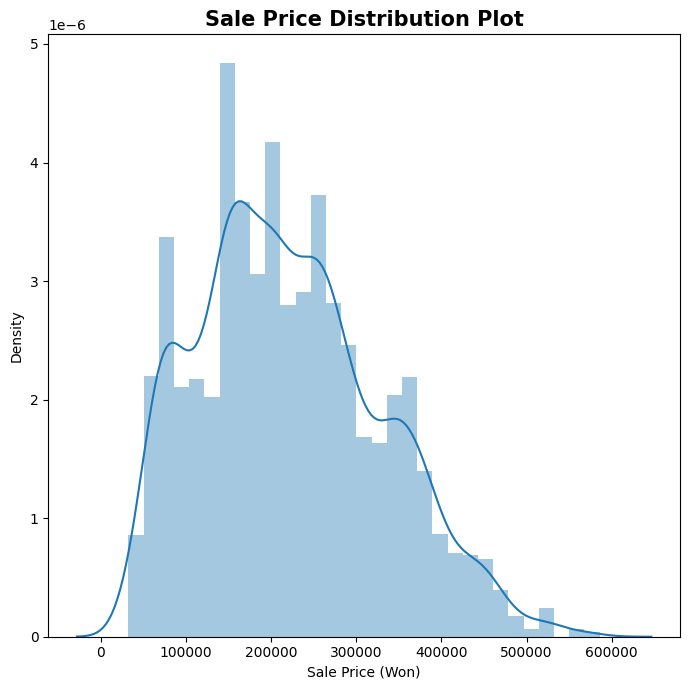

In [8]:
# Plot distribusi 'SalePrice'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution Plot', size=15, weight='bold')
plt.xlabel('Sale Price (Won)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


**Distribusi Harga Jual Apartemen**

Visualisasi: Histogram distribusi harga (Sale Price Distribution) menunjukkan sebaran harga yang right-skewed.

Insight: Mayoritas apartemen berada pada kisaran harga 100.000–300.000 Won, dengan beberapa unit berharga jauh lebih tinggi yang berperan sebagai outlier. Hal ini mengindikasikan adanya variasi signifikan dalam penetapan harga, kemungkinan dipengaruhi oleh lokasi strategis, ukuran unit, atau fasilitas yang unggul.

In [13]:
# 2) Jumlah unit berdasarkan Hallway Type dan subway station

print(f"Jumlah properti di tiap neighbourhood group:\n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah tiap tipe properti:\n{df['HallwayType'].value_counts()}")

Jumlah properti di tiap neighbourhood group:
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

Jumlah tiap tipe properti:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64


In [14]:
# Grouping tipe unit berdasarkan subway station
df.groupby(['SubwayStation', 'HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

In [16]:
# Cek median price untuk berdasarkan subway station
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0


HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


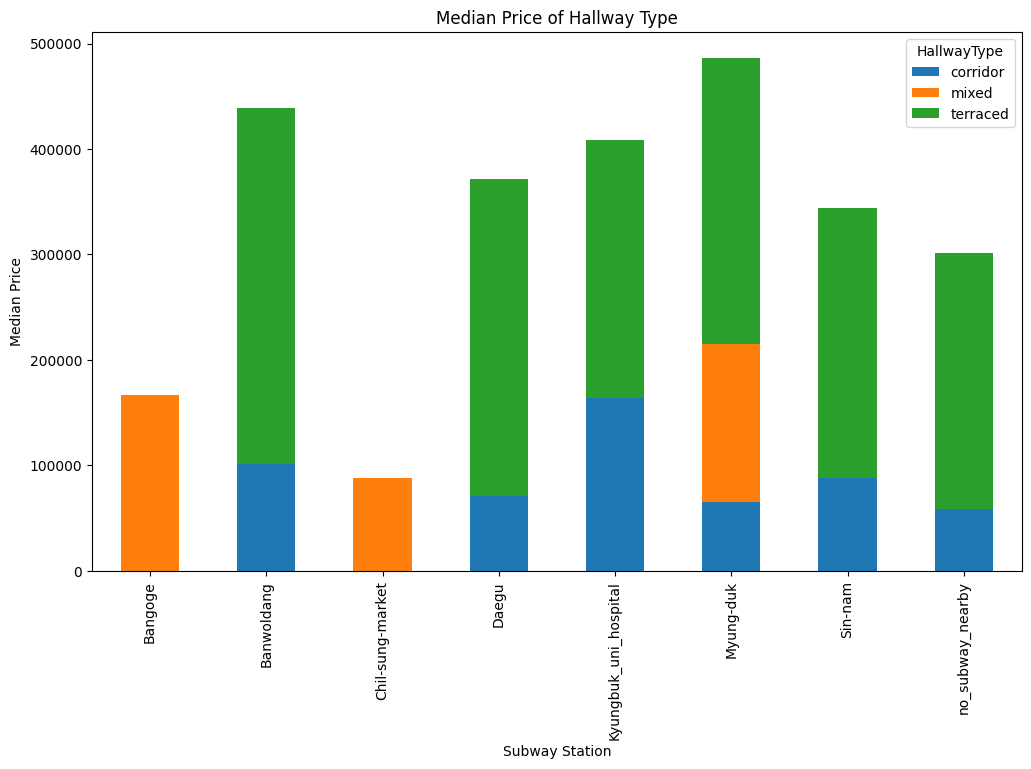

In [17]:
# Plot harga median untuk tiap Hallway Type di setiap Subway Station
from IPython.display import display

subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
display(subway_pivot)

pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Hallway Type');

1. Dominasi tipe Terraced

- Hampir di semua stasiun subway, Hallway Type Terraced memiliki median harga paling tinggi.
- Lokasi seperti Banwoldang, Daegu, dan Myung-duk menunjukkan gap harga yang besar antara Terraced dan tipe lainnya, menandakan premium value untuk tipe ini.

2. Tipe Mixed sebagai kelas menengah

- Tipe Mixed hanya muncul di beberapa stasiun seperti Bangoge, Chil-sung-market, dan Myung-duk.
- Harga median tipe Mixed cenderung berada di tengah, menjadi alternatif lebih murah dibanding Terraced namun lebih mahal dibanding Corridor.

3. Tipe Corridor harga terendah

- Corridor konsisten memiliki median harga terendah di hampir semua lokasi.
- Bahkan di lokasi strategis seperti Kyungbuk_uni_hospital atau Myung-duk, harga median Corridor masih jauh di bawah Terraced.

4. Pengaruh lokasi

- Stasiun seperti Myung-duk dan Banwoldang menampilkan total median harga tinggi, menunjukkan bahwa lokasi strategis mampu mengangkat harga semua tipe Hallway.
- Chil-sung-market dan no_subway_nearby memiliki harga total lebih rendah, mengindikasikan pengaruh negatif dari lokasi yang kurang strategis terhadap harga apartemen.

Text(0.5, 1.0, 'Korelasi Antar Fitur Fasilitas')

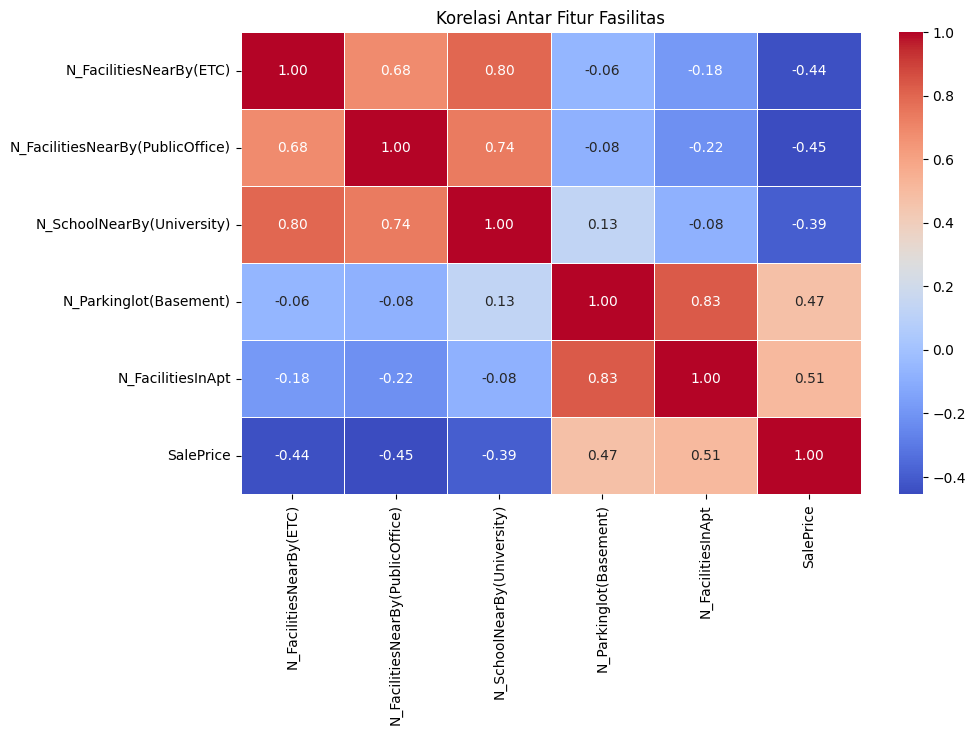

In [25]:
# Terdapat beberapa jenis tipe fasilitas, maka akan dicari terlebih dahulu korelasi antar variabelnya 
facility_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)', 'N_Parkinglot(Basement)','N_FacilitiesInApt','SalePrice']
corr = df[facility_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur Fasilitas')

Berikut insight dari heatmap korelasi antar fitur fasilitas dengan SalePrice:

1. Hubungan positif dengan harga:

- N_FacilitiesInApt (0.51) dan N_Parkinglot(Basement) (0.47) menunjukkan korelasi positif moderat terhadap harga jual apartemen.

→ Artinya, semakin banyak fasilitas di dalam apartemen dan semakin banyak parkiran basement, cenderung harga jual lebih tinggi.

2. Hubungan negatif dengan harga:

- N_FacilitiesNearBy(ETC) (-0.44), N_FacilitiesNearBy(PublicOffice) (-0.45), dan N_SchoolNearBy(University) (-0.39) justru memiliki korelasi negatif dengan harga.

→ Hal ini bisa mengindikasikan bahwa apartemen yang berada di area dengan banyak fasilitas umum di sekitar tidak selalu mahal, kemungkinan karena lokasinya berada di area yang lebih padat atau kurang eksklusif.

3. Korelasi antar variabel fasilitas:

- Terdapat korelasi tinggi antara N_Parkinglot(Basement) dan N_FacilitiesInApt (0.83), yang mengindikasikan adanya potensi multicollinearity.
- N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), dan N_SchoolNearBy(University) juga saling berkorelasi tinggi (> 0.68), sehingga mungkin berasal dari faktor lokasi yang sama.

4. Implikasi untuk modeling:

- Fitur dengan korelasi tinggi terhadap SalePrice dapat menjadi prediktor utama.
- Perlu diuji apakah multicollinearity akan mengganggu model (terutama regresi linear), sehingga mungkin perlu dilakukan feature selection atau dimensionality reduction.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [51]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [52]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 5min~10min]"
2,SubwayStation,object,0,0.0,8,"[Sin-nam, Myung-duk]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[2.0, 5.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[0.0, 3.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 1.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[18.0, 798.0]"
7,YearBuilt,int64,0,0.0,16,"[2006, 1986]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[2, 8]"
9,Size(sqf),int64,0,0.0,89,"[1092, 818]"


Dari info dataset di atas, tidak terdapat data yang kosong pada fitur atau kolom.

In [53]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(1422)

In [54]:
df_model.drop_duplicates(inplace=True)

In [55]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


**Data Correlation**

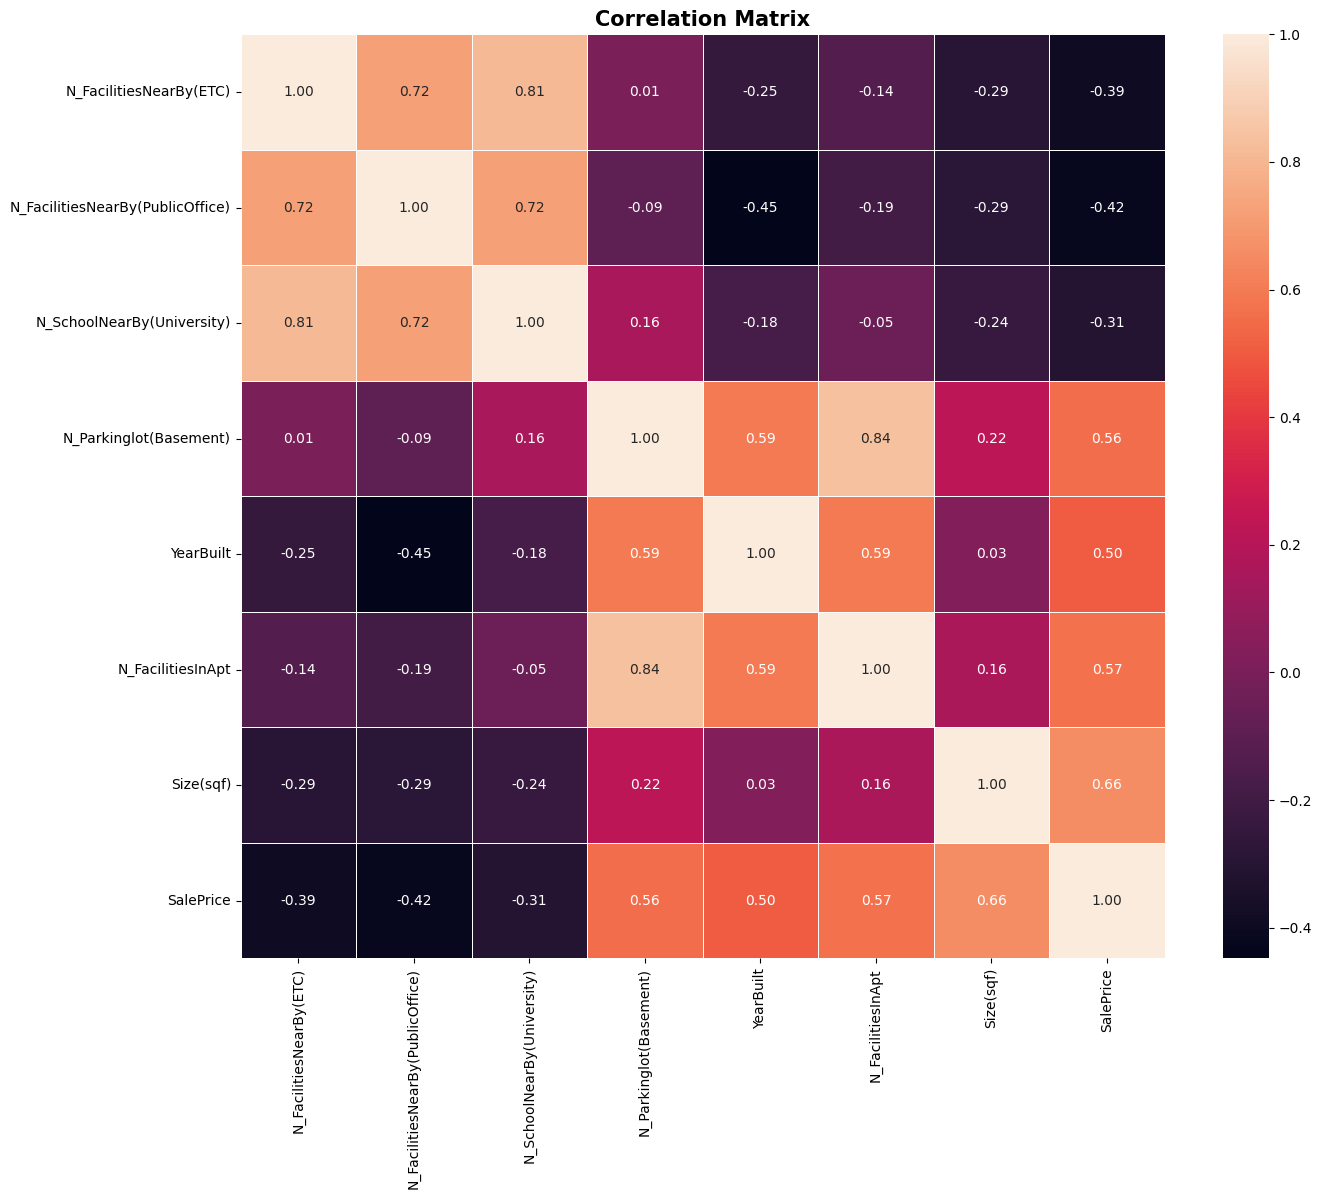

In [56]:
# Correlation matrix
plt.figure(figsize=(15, 12))
corr = df_model[num_features].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

1. Fitur yang Paling Berkorelasi dengan Harga (SalePrice)
- Size(sqf) → korelasi +0.66 → ukuran apartemen adalah faktor paling kuat yang memengaruhi harga. Semakin besar ukuran (sqf), semakin tinggi harga jual.
- N_FacilitiesInApt → korelasi +0.57 → jumlah fasilitas internal di apartemen berpengaruh positif terhadap harga.
- N_Parkinglot(Basement) → korelasi +0.56 → semakin banyak slot parkir basement, harga cenderung lebih tinggi.
- YearBuilt → korelasi +0.50 → apartemen yang dibangun lebih baru cenderung memiliki harga jual lebih tinggi.

2. Fitur yang Negatif Berkorelasi dengan Harga
- N_FacilitiesNearBy(ETC) (-0.39),
- N_FacilitiesNearBy(PublicOffice) (-0.42),
- N_SchoolNearBy(University) (-0.31)
- → Menariknya, jumlah fasilitas publik di sekitar justru berkorelasi negatif dengan harga.
Ini bisa terjadi jika apartemen di area dengan banyak fasilitas publik justru berada di wilayah yang harga tanahnya lebih murah (misalnya jauh dari pusat bisnis).

3. Korelasi Tinggi Antar Fitur (Potensi Multikolinearitas)
- N_FacilitiesNearBy(ETC) ↔ N_FacilitiesNearBy(PublicOffice) = 0.72
- N_FacilitiesNearBy(ETC) ↔ N_SchoolNearBy(University) = 0.81
- N_FacilitiesNearBy(PublicOffice) ↔ N_SchoolNearBy(University) = 0.72
- N_Parkinglot(Basement) ↔ N_FacilitiesInApt = 0.84

📌 Artinya, beberapa fitur ini membawa informasi yang mirip. Saat modelling, ini bisa menyebabkan multicollinearity pada model linear. Solusinya:
- Gunakan metode feature selection (misalnya Variance Inflation Factor / VIF).
- Atau pakai model tree-based (Random Forest, XGBoost) yang lebih tahan terhadap korelasi antar fitur.

4. Implikasi untuk Modelling
- Fitur utama untuk prediksi harga: Size(sqf), N_FacilitiesInApt, N_Parkinglot(Basement), YearBuilt.
- Fitur perlu diolah/ditinjau ulang: jumlah fasilitas publik sekitar (N_FacilitiesNearBy...) karena hubungan negatifnya mungkin konteks-spesifik.
- Perlu cek distribusi & outlier pada fitur ukuran (Size(sqf)) dan parkir basement karena efeknya sangat besar.



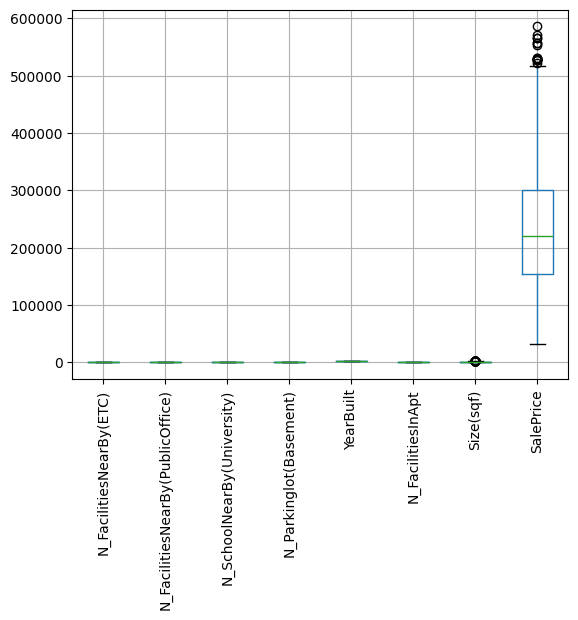

In [57]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

1. Outlier yang Sangat Jelas
- SalePrice → terdapat banyak outlier di atas whisker atas, menunjukkan ada apartemen dengan harga jauh di atas mayoritas data.
- Outlier ini bisa berasal dari properti mewah atau lokasi premium.
- Perlu dipertimbangkan apakah akan di-cap (winsorizing) atau tetap dipertahankan sesuai konteks.
- Size(sqf) → ada beberapa outlier besar, kemungkinan unit apartemen yang sangat luas (penthouse atau unit kombinasi).

2. Skala yang Tidak Seimbang
- Karena SalePrice dan Size(sqf) punya skala jauh lebih besar dibanding fitur lain, boxplot untuk fitur lain terlihat “tertekan” di bawah.
- Hal ini menandakan perlu dilakukan scaling sebelum modelling (misalnya StandardScaler atau MinMaxScaler) agar model tidak bias ke fitur berskala besar.

3. Distribusi Fitur Lainnya
- Fitur seperti N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt, dan YearBuilt relatif tidak memiliki outlier ekstrem (kecuali mungkin sedikit titik di N_Parkinglot(Basement)).
- YearBuilt tidak menunjukkan outlier, tapi tetap perlu diubah menjadi umur bangunan (BuildingAge) agar interpretasi lebih mudah.

4. Implikasi untuk Preprocessing
- Handling outlier: Fokus pada SalePrice dan Size(sqf) untuk capping outlier di persentil tinggi.
- Scaling: Semua fitur numerik akan di-scale untuk menghindari dominasi fitur berskala besar.
- Transformasi log: SalePrice hampir pasti di-log transform untuk mengurangi skewness. Size(sqf) juga bisa dipertimbangkan jika distribusinya sangat skewed.

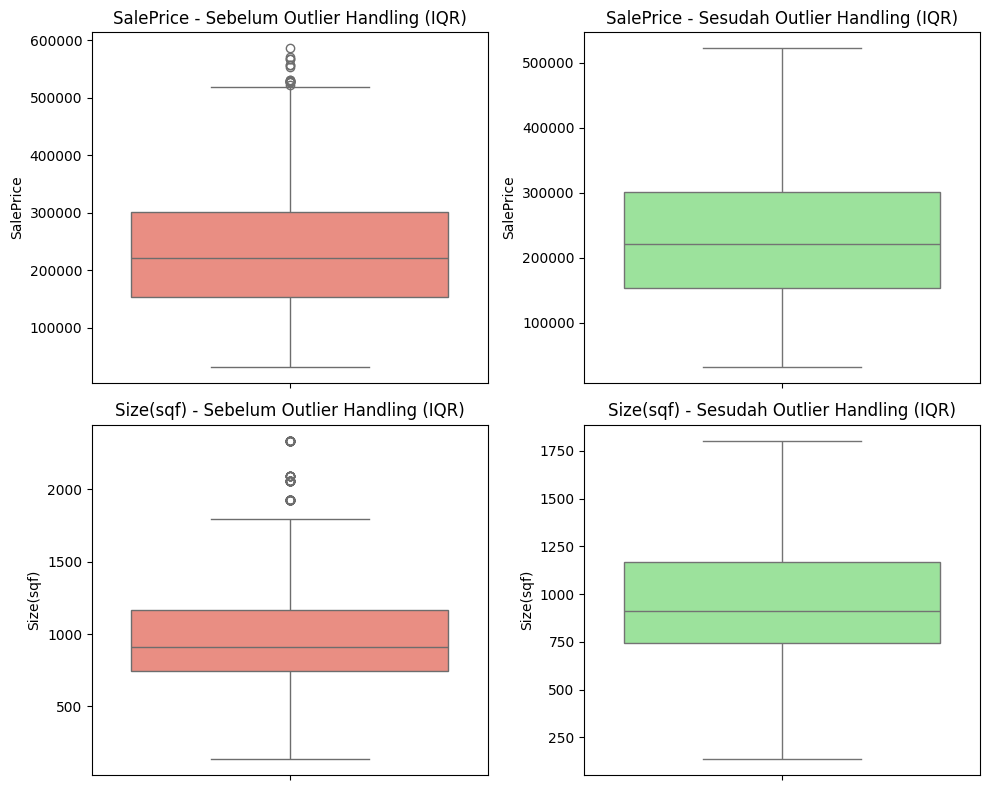

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Backup data sebelum cap
df_before = df_model.copy()

# Fungsi cap outlier dengan IQR
def cap_outliers_iqr(df, col, k=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    df[col] = np.clip(df[col], lower, upper)
    return df

# Tangani outlier dengan IQR
df_after = df_before.copy()
df_after = cap_outliers_iqr(df_after, 'SalePrice', k=1.5)
df_after = cap_outliers_iqr(df_after, 'Size(sqf)', k=1.5)

# Plot perbandingan
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# SalePrice
sns.boxplot(y=df_before['SalePrice'], ax=axes[0,0], color="salmon")
axes[0,0].set_title("SalePrice - Sebelum Outlier Handling (IQR)")
sns.boxplot(y=df_after['SalePrice'], ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("SalePrice - Sesudah Outlier Handling (IQR)")

# Size(sqf)
sns.boxplot(y=df_before['Size(sqf)'], ax=axes[1,0], color="salmon")
axes[1,0].set_title("Size(sqf) - Sebelum Outlier Handling (IQR)")
sns.boxplot(y=df_after['Size(sqf)'], ax=axes[1,1], color="lightgreen")
axes[1,1].set_title("Size(sqf) - Sesudah Outlier Handling (IQR)")

plt.tight_layout()
plt.show()


In [60]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [59]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


### **Modeling**

In [78]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [79]:
df_model.columns
cat_features = ['HallwayType', 'SubwayStation', 'TimeToSubway']

In [81]:
hasil = []

for col in df_model.columns:
    hasil.append({
        'Columns': col,
        'Total Unique Values': df_model[col].nunique(),
        'Unique Values': df_model[col].unique()
    })
    
hasil_df = pd.DataFrame(hasil)

pd.set_option('display.max_colwidth', None)
hasil_df

,Columns,Total Unique Values,Unique Values
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


**Data Splitting**

In [82]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

In [83]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

In [84]:
cat_features = ['HallwayType', 'SubwayStation', 'TimeToSubway']

In [85]:
num_features_scale = ['N_Parkinglot(Basement)','YearBuilt', 'Size(sqf)']

In [86]:
for i in num_features_scale:
    num_features.remove(i)
num_features.remove('SalePrice')
num_features

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt']

In [87]:
# Mengubah fitur kategorikal menjadi numerikal
# num_transform = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False))  # ini dia!
# ])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), cat_features),
    ('Scaler', StandardScaler(), num_features_scale)
    # ('Num Trans',num_transform,num_features)
], remainder='passthrough')

In [88]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['HallwayType', 'SubwayStation',
                                  'TimeToSubway']),
                                ('Scaler', StandardScaler(),
                                 ['N_Parkinglot(Basement)', 'YearBuilt',
                                  'Size(sqf)'])])

**Choose a Benchmark Model**

In [89]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)
grad = GradientBoostingRegressor(random_state=1)
supvr = SVR()


# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_grad = TransformedTargetRegressor(grad, func=np.log, inverse_func=np.exp)
log_supvr = TransformedTargetRegressor(supvr, func=np.log, inverse_func=np.exp)
# Scaling data


# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada, log_grad,log_supvr]
# models = [lr, knn, dt, rf, xgb]


score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise' 
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54704.38599017 -55411.30595616 -51427.06787955 -53834.20143464
 -51678.78550161] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-43703.68632913 -43016.06172041 -40713.46623389 -42231.60143227
 -41050.57172961] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22208793 -0.21845548 -0.19639539 -0.20310804 -0.20933441] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-51351.8968423  -49542.36708884 -48655.76481654 -49757.14226522
 -49847.39947147] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-40774.01623153 -37684.22939811 -39068.54503843 -39121.96485625
 -39036.69247825] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [90]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor','Adaboost Regressor', 'GradientBoosting Regressor', 'SVR'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-53411.149352,1599.357640,-42143.077489,1135.147134,-0.209876,0.009493
1,KNN Regressor,-49830.914097,869.866400,-39137.089601,980.340580,-0.193150,0.004377
2,DecisionTree Regressor,-46785.186069,864.337339,-37034.430114,962.919248,-0.186774,0.006737
3,RandomForest Regressor,-46549.066100,841.140974,-36974.070043,961.054508,-0.185701,0.005971
4,XGBoost Regressor,-46637.975000,823.445620,-36985.727344,934.299088,-0.186320,0.006431
5,Adaboost Regressor,-54815.391538,1857.435704,-43627.853139,1451.608464,-0.209593,0.004791
6,GradientBoosting Regressor,-46333.382195,738.190405,-36999.439798,881.189946,-0.185318,0.004840
7,SVR,-47349.611164,658.923511,-37487.847812,793.457079,-0.187915,0.007562


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE dan MAE dan MAPE, Gradboosting adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 1 benchmark model terbaik, yaitu Gradboost. 

****

In [106]:
# === 0) Import ===
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# --- Jika belum ada: X_train, X_test, y_train, y_test sudah kamu buat seperti screenshot ---

# === 1) Preprocessing ===
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = [c for c in X_train.columns if c not in num_cols]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# === 2) Definisikan 3 model kandidat (pakai setingan umum yang solid) ===
models = {
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=3, subsample=0.9, random_state=1
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=600, max_depth=None, min_samples_split=2, min_samples_leaf=1,
        n_jobs=-1, random_state=1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=800, max_depth=6, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, objective="reg:squarederror", n_jobs=-1, random_state=1
    )
}

# Catatan:
# - Kalau kamu sudah punya hyperparameter hasil tuning, tinggal ganti param di atas.

# === 3) Fungsi evaluasi di test set ===
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_on_test(base_model):
    pipe = Pipeline([
        ("preprocessing", preprocess),
        ("reg", TransformedTargetRegressor(
            regressor=base_model, func=np.log, inverse_func=np.exp
        ))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # FIX: RMSE kompatibel skikit-learn lama
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))  # pastikan y_test > 0

    return pipe, {"RMSE": rmse, "MAE": mae, "MAPE": mape}


# === 4) Latih, evaluasi, dan bandingkan ===
results = []
trained_pipes = {}

for name, mdl in models.items():
    pipe, metrics = evaluate_on_test(mdl)
    trained_pipes[name] = pipe
    results.append({"Model": name, **metrics})

results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
print(results_df)

# === 5) Pilih pemenang & buat prediksi final di test set ===
best_name = results_df.loc[0, "Model"]
best_pipe = trained_pipes[best_name]
y_test_pred = best_pipe.predict(X_test)

print(f"\nModel terbaik (berdasarkan RMSE test set): {best_name}")
print(f"RMSE: {results_df.loc[0, 'RMSE']:.2f} | MAE: {results_df.loc[0, 'MAE']:.2f} | MAPE: {results_df.loc[0, 'MAPE']:.4f}")

# (Opsional) Simpan prediksi untuk analisis lanjutan
pred_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_test_pred})
# pred_df.to_csv("daegu_test_predictions.csv", index=False)


              Model          RMSE           MAE      MAPE
0  GradientBoosting  47043.287521  36627.012735  0.174604
1      RandomForest  47218.258282  36986.355171  0.177054
2           XGBoost  47221.421580  36939.644531  0.176423

Model terbaik (berdasarkan RMSE test set): GradientBoosting
RMSE: 47043.29 | MAE: 36627.01 | MAPE: 0.1746


****

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Gradboost dan XGBoost

In [91]:
# Benchmark 2 model terbaik
models_benchmark = {
    'Grad': GradientBoostingRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models_benchmark:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models_benchmark[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models_benchmark.keys())
score_before_tuning

,RMSE,MAE,MAPE
Grad,46312.658773,36789.791789,0.180585
XGB,46932.923029,37358.433594,0.184816


- Ketika dilakukan prediksi pada test set, performa GradientBoosting secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE dan MAPE yang sedikit lebih rendah dari XGBoost.


**Hyperparameter Tuning**

Karena model GradBoosting memiliki performa yang sedikit lebih baik dari XGBoost, maka selanjutnya kita akan menggunakan model GradBoosting ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model GradBoosting dengan harapan dapat meningkatkan performa model.

In [92]:
# Kedalaman pohon
max_depth = list(np.arange(1, 21,2))

# Learning rate
learning_rate = list(np.arange(10, 101,10)/1000)

# Jumlah pohon
n_estimators = list(np.arange(1000, 2001,100))

# Persentase data yang digunakan per pohon
subsample = list(np.arange(2, 10)/10)

# Max leaf nodes
max_leaf_nodes = list(np.arange(1, 11))

# Impurity threshold minimum untuk split
min_impurity_decrease = list(np.arange(0, 1.1, 0.1))  

# Jumlah feature untuk tiap split
max_features = list(np.arange(0.1, 1.0, 0.1))+['sqrt','log2','auto']  # 10%–90% dari total fitur

# Hyperparam space untuk Gradient Boosting Regressor

robust = RobustScaler()
standard = StandardScaler()
minmax = MinMaxScaler()

hyperparam_space_gbr = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_leaf_nodes': max_leaf_nodes,
    'model__min_impurity_decrease': min_impurity_decrease,
    'model__max_features': max_features,
    'preprocessing__Scaler':[robust,standard,minmax]
}


In [93]:
# Benchmark model dengan hyperparameter tuning
grad = GradientBoostingRegressor(random_state=42, verbose=0)


# Membuat algorithm chains
estimator_grad = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', grad)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_grad = RandomizedSearchCV(
    estimator_grad, 
    param_distributions = hyperparam_space_gbr,
    n_iter = 250,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [94]:
# Fitting data training untuk mencari parameter terbaik
random_grad.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation',
                                                                                'TimeToSubway']),
                                                                              ('Scaler',
                                                                               StandardScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'Size(sqf)'])])),
                                             ('model',
                                              Gra...
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)],
                                        'preprocessing__Scaler': [RobustScaler(),
                                                                  StandardScaler(),
                                                                  MinMaxScaler()]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [95]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_grad.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__Scaler,param_model__subsample,param_model__n_estimators,param_model__min_impurity_decrease,param_model__max_leaf_nodes,param_model__max_features,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
92,6.190535,0.328474,0.071476,0.006057,MinMaxScaler(),0.6,1100,0.0,6,0.3,...,1082.405224,103,-0.195703,-0.193972,-0.196371,-0.196208,-0.196778,-0.195807,0.000980,132
32,10.406741,0.157856,0.083075,0.005885,RobustScaler(),0.5,1900,0.7,5,0.3,...,1036.725150,73,-0.194855,-0.193928,-0.195847,-0.195143,-0.195991,-0.195153,0.000745,111
243,7.855093,0.826776,0.074232,0.003889,RobustScaler(),0.6,1300,0.5,9,log2,...,1034.424211,3,-0.193692,-0.193867,-0.195236,-0.196344,-0.194586,-0.194745,0.000970,91
178,9.737510,2.091764,0.136562,0.107022,RobustScaler(),0.4,1100,0.9,5,0.3,...,1012.079819,77,-0.194172,-0.193989,-0.195168,-0.197099,-0.194304,-0.194946,0.001150,103
155,10.638915,0.296358,0.097077,0.025498,StandardScaler(),0.8,1800,0.3,6,0.3,...,1010.791577,13,-0.193593,-0.193536,-0.194597,-0.195957,-0.194897,-0.194516,0.000899,71


In [96]:
# Cek skor dan params terbaik
print('GradBoost')
print('Best_score:', random_grad.best_score_)
print('Best_params:', random_grad.best_params_)

GradBoost
Best_score: -46351.4984134597
Best_params: {'preprocessing__Scaler': MinMaxScaler(), 'model__subsample': np.float64(0.6), 'model__n_estimators': np.int64(1100), 'model__min_impurity_decrease': np.float64(0.0), 'model__max_leaf_nodes': np.int64(6), 'model__max_features': np.float64(0.30000000000000004), 'model__max_depth': np.int64(5), 'model__learning_rate': np.float64(0.01)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model GradBoosting dan hyperparameter terpilih.

In [97]:
# Model GradBoosting
model = {'Grad': GradientBoostingRegressor(random_state=42)}

# Define model terhadap estimator terbaik
grad_tuning = random_grad.best_estimator_

# Fitting model
grad_tuning.fit(X_train, y_train)

# Predict test set
y_pred_grad_tuning = grad_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_grad_tuning = np.sqrt(mean_squared_error(y_test, y_pred_grad_tuning))
mae_grad_tuning = mean_absolute_error(y_test, y_pred_grad_tuning)
mape_grad_tuning = mean_absolute_percentage_error(y_test, y_pred_grad_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_grad_tuning, 'MAE': mae_grad_tuning, 'MAPE': mape_grad_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
Grad,46473.724521,37054.51616,0.184155


**Performance Comparison**

Perbandingan performa model GradBoosting sebelum dan sesudah dilakukan hyperparameter tuning.

In [98]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['Grad']).T

,RMSE,MAE,MAPE
Grad,46312.658773,36789.791789,0.180585


In [99]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
Grad,46473.724521,37054.51616,0.184155


Model tidak mengalami peningkatan performa yang berarti dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 46312, 36789, 0.180585
- RMSE, MAE & MAPE setelah tuning: 46473, 37054, 0.184155

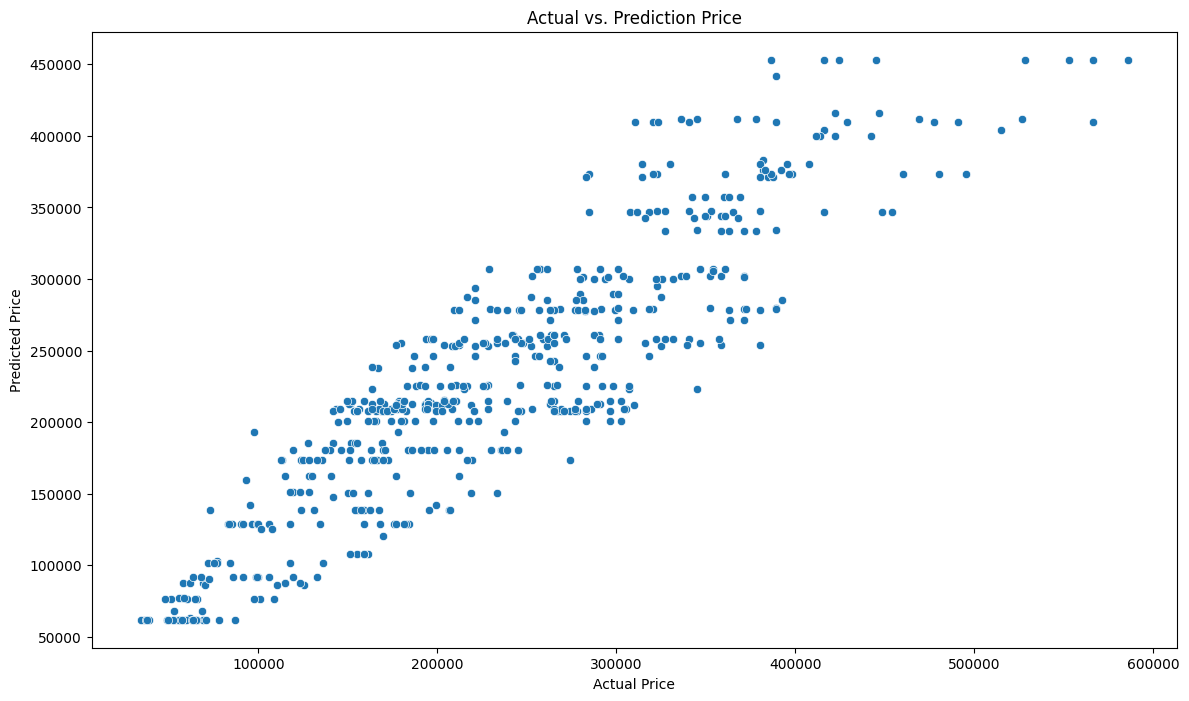

In [100]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_grad_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

- Sebagian besar titik membentuk garis diagonal dari kiri bawah ke kanan atas.
- Artinya, secara umum model mampu memprediksi harga yang searah dengan nilai aktual — jika harga aktual tinggi, prediksi juga cenderung tinggi.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [102]:
transformer.get_feature_names_out()

array(['One Hot__HallwayType_mixed', 'One Hot__HallwayType_terraced',
       'One Hot__SubwayStation_Banwoldang',
       'One Hot__SubwayStation_Chil-sung-market',
       'One Hot__SubwayStation_Daegu',
       'One Hot__SubwayStation_Kyungbuk_uni_hospital',
       'One Hot__SubwayStation_Myung-duk',
       'One Hot__SubwayStation_Sin-nam',
       'One Hot__SubwayStation_no_subway_nearby',
       'One Hot__TimeToSubway_10min~15min',
       'One Hot__TimeToSubway_15min~20min',
       'One Hot__TimeToSubway_5min~10min',
       'One Hot__TimeToSubway_no_bus_stop_nearby',
       'Scaler__N_Parkinglot(Basement)', 'Scaler__YearBuilt',
       'Scaler__Size(sqf)', 'remainder__N_FacilitiesNearBy(ETC)',
       'remainder__N_FacilitiesNearBy(PublicOffice)',
       'remainder__N_SchoolNearBy(University)',
       'remainder__N_FacilitiesInApt'], dtype=object)

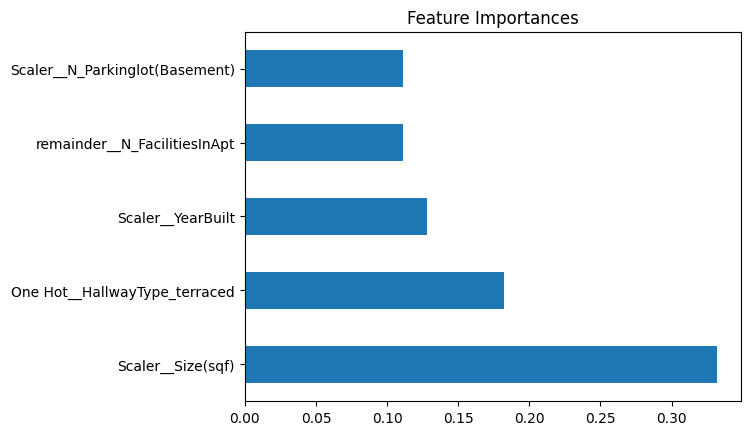

In [103]:
# Plot feature importances
feature_imp = pd.Series(grad_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(5)
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang telah dilakukan, fitur Size(sqf) dan HallwayType_terraced menjadi variabel yang paling berpengaruh terhadap SalePrice. Fitur lain seperti YearBuilt, N_Parkinglot(Basement), dan N_FacilitiesInApt juga memiliki kontribusi signifikan, meskipun pengaruhnya lebih kecil dibandingkan dua fitur utama.

Metrik evaluasi pada model terbaik (Gradient Boosting Regressor) di test set menunjukkan nilai RMSE sebesar 47,043.29, MAE 36,627.01, dan MAPE 17.46%. Jika ditinjau dari nilai MAPE ini, dapat disimpulkan bahwa rata-rata prediksi harga apartemen memiliki deviasi sekitar 17% dari harga aktual. Artinya, untuk harga apartemen yang sebenarnya ₩500 juta, model berpotensi meleset ± ₩85 juta.

Namun, tetap ada kemungkinan prediksi meleset lebih jauh akibat keterbatasan fitur yang tersedia. Dataset tidak mencakup beberapa faktor penting lain yang mungkin memengaruhi harga, seperti kondisi interior, pemandangan dari unit, kualitas bangunan, atau faktor eksternal seperti kedekatan dengan pusat komersial. Hal ini bisa menyebabkan bias model yang terlihat pada visualisasi antara harga aktual dan prediksi.

Model ini masih dapat dioptimalkan untuk meningkatkan akurasi, misalnya dengan menambahkan fitur relevan atau melakukan tuning lanjutan. Selain itu, dapat dilakukan A/B testing terhadap model ini dalam simulasi prediksi harga di pasar sebenarnya untuk mengukur efektivitasnya. Dari hasil A/B testing tersebut, kita dapat memperoleh insight tambahan terkait pola error dan peluang perbaikan model di masa depan.

### **Recommendations**

Lakukan A/B testing untuk menguji efektivitas model terhadap akurasi prediksi harga apartemen jika dibandingkan dengan metode penilaian harga tradisional atau estimasi manual oleh agen properti.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Analisis Error dan Penyesuaian Fitur: Mengecek prediksi yang memiliki error tinggi, baik overestimation maupun underestimation, lalu mengelompokkan sekitar 5% data dengan error paling ekstrem. Dari sini dapat dianalisis variabel apa saja yang sering muncul pada kelompok tersebut, seperti luas unit yang sangat besar, tipe hallway tertentu, atau apartemen yang dibangun pada tahun tertentu. Hasil analisis ini dapat digunakan untuk melakukan feature engineering tambahan atau melakukan penyesuaian pada preprocessing agar model lebih adaptif.

2. Penambahan Fitur yang Lebih Relevan: Menambahkan variabel yang lebih korelatif dengan harga, seperti kondisi interior, kualitas bangunan, pemandangan, kedekatan dengan pusat komersial, dan jumlah fasilitas umum di sekitar apartemen. Penambahan variabel eksternal seperti data demografi dan tren harga per wilayah juga dapat meningkatkan kapasitas prediksi model.

3. Eksperimen dengan Model yang Lebih Kompleks: Meskipun Gradient Boosting sudah memberikan performa terbaik, tetap ada peluang mencoba model yang lebih kompleks seperti LightGBM, CatBoost, atau stacking model yang menggabungkan beberapa algoritma. Jika dataset ditambah atau diperluas, pendekatan seperti deep learning (misalnya feed-forward neural networks) juga bisa dipertimbangkan.

4. Penggunaan Model untuk Aplikasi Nyata: Model yang sudah dibangun dapat diintegrasikan ke sistem rekomendasi harga apartemen bagi agen properti atau platform listing real estate di Korea. Misalnya, model bisa memberikan saran harga optimal berdasarkan tren pasar terbaru, lalu dibandingkan dengan harga yang dipasang pemilik unit. Dengan melakukan pemantauan berkala terhadap selisih harga model dan harga aktual di pasar, kita dapat mengukur efektivitas model serta mengidentifikasi area yang perlu disesuaikan.

### **Save Model**

In [110]:
import joblib

# Asumsinya 'best_pipe' adalah pipeline Gradient Boosting terbaik
# yang sudah kita fit dengan X_train, y_train

# Simpan model
joblib.dump(best_pipe, 'model_gradboost_daegu.joblib')
print("✅ Model berhasil disimpan sebagai 'model_gradboost_daegu.joblib'")


✅ Model berhasil disimpan sebagai 'model_gradboost_daegu.joblib'


In [113]:
import joblib

# Load model
loaded_model = joblib.load('model_gradboost_daegu.joblib')
print("✅ Model berhasil dimuat kembali")


✅ Model berhasil dimuat kembali


In [114]:
# Contoh evaluasi ulang di test set
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))
print(f"RMSE (Test Set): {rmse:,.2f} Won")


RMSE (Test Set): 47,043.29 Won
